In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.optimize import curve_fit #Use non-linear least squares to fit a function, f, to data.
from scipy.integrate import solve_ivp, quad
from scipy.linalg import eig # Solve an ordinary or generalized eigenvalue problem of a square matrix.

In [ ]:
# Agrega el directorio superior al path
sys.path.append(os.path.abspath('..'))


In [ ]:
import scr.metodos as met

In [ ]:
import seaborn as sns

In [ ]:
import scr.plt_conf as conf
conf.general() 

### Estado Base para n=0 para $\lambda'= ,-1,0,1,10,15,20$ y calculo de la masa para cada caso. 

In [13]:
##Masa vs Radio
wmin, wmax = 0.0, 2.1
p0 = 0.1
nodos = 0
in0 = [1, 1, p0, 0, 0, 0]

datos = []
Lambdas = [-1,0,1,10,15,20]
for i in Lambdas: 
    # in0, wmin, wmax, Lambda, nodos, rmin=0, rmax=50, met='RK45', Rtol=1e-03, Atol=1e-6, limw=1e-14, info=False
    w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, i, nodos,rmin=0, rmax=100, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)
    datos.append([w0, rTemp, nodosPosit, i])

Finding a profile with  0 nodes
Maxima precisión alcanzada 1.068160769755732 radio 57.46438933156265
Finding a profile with  0 nodes
Maxima precisión alcanzada 1.0726981262163513 radio 59.1505456789699
Finding a profile with  0 nodes
Maxima precisión alcanzada 1.0775068306999296 radio 55.24929761275468
Finding a profile with  0 nodes
Maxima precisión alcanzada 1.132385585825886 radio 49.64844747337
Finding a profile with  0 nodes
Maxima precisión alcanzada 1.1692688834899083 radio 45.566424125439674
Finding a profile with  0 nodes
Maxima precisión alcanzada 1.2078739869374477 radio 42.998034304380276


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_19980/2448371548.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (10,5))


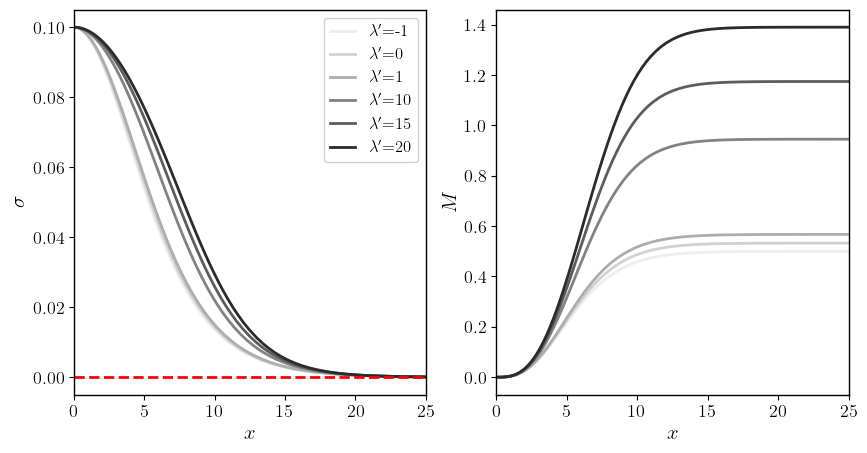

In [14]:
fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (10,5))

colores = colores = sns.color_palette("Greys", 6)

ax0 = axes[1]
ax1 = axes[0]


for j,i in enumerate(datos): 
    #profiles(datos, in0, rmin, Rtol, Atol, info = False)
    r, g, N, Phi, Phi_1, m, dN, N = met.profiles(i, in0, rmin = 0 , Rtol=1e-09, Atol=1e-10, info = False)
    ax1.plot(r, Phi,  label=r'$\lambda^\prime$={}'.format(Lambdas[j]), color = colores[j])
    ax0.plot(r, m, color = colores[j])

ax1.set_xlim(0,25)
ax0.set_xlim(0,25)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\sigma$')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$M$')
ax1.axhline(y=0, color='r', linestyle='--')
ax1.legend(fontsize = 12)
plt.savefig("RelativisticBoson_starLambdas.pdf")
plt.show() 

In [15]:
colores = sns.color_palette("RdBu", 12)
print(colores)

[(0.6230680507497116, 0.07012687427912341, 0.1566320645905421), (0.7727797001153403, 0.243598615916955, 0.2392156862745098), (0.8761245674740484, 0.46136101499423293, 0.3671664744329104), (0.9589388696655133, 0.659515570934256, 0.5257208765859284), (0.9866205305651673, 0.8256055363321797, 0.7379469434832755), (0.9773933102652826, 0.9277201076509035, 0.8985005767012687), (0.9131103421760862, 0.9423298731257209, 0.95840061514802), (0.7808535178777396, 0.8783544790465208, 0.9301038062283737), (0.5870818915801617, 0.779930795847751, 0.8747404844290658), (0.3599384851980012, 0.6379853902345254, 0.7979238754325261), (0.2, 0.4934256055363322, 0.7222606689734717), (0.10142252979623223, 0.34602076124567477, 0.5995386389850058)]


### Mini-Boson Star Excited States $\lambda = 0$ 

In [16]:
##Masa vs Radio
wmin, wmax = 0.0, 2.1
p0 = 0.1
nodos = [0,1,2,3]

in0 = [1, 1, p0, 0, 0, 0]

datos = []
Lambdas = [0]

for j in nodos: 
    for i in Lambdas: 
        # in0, wmin, wmax, Lambda, nodos, rmin=0, rmax=50, met='RK45', Rtol=1e-03, Atol=1e-6, limw=1e-14, info=False
        w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, i, j,rmin=0, rmax=100, met='RK45', Rtol=1e-09, Atol=1e-10,
                   limw=1e-14, info=False)
        datos.append([w0, rTemp, nodosPosit, i])

Finding a profile with  0 nodes
Maxima precisión alcanzada 1.0726981262163513 radio 59.1505456789699
Finding a profile with  1 nodes
Maxima precisión alcanzada 1.0986062145339972 radio 77.59179310620965
Finding a profile with  2 nodes
Maxima precisión alcanzada 1.1107053449093267 radio 94.55162648439078
Finding a profile with  3 nodes
Found 1.1184262280435178


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_19980/249664886.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (10,5))


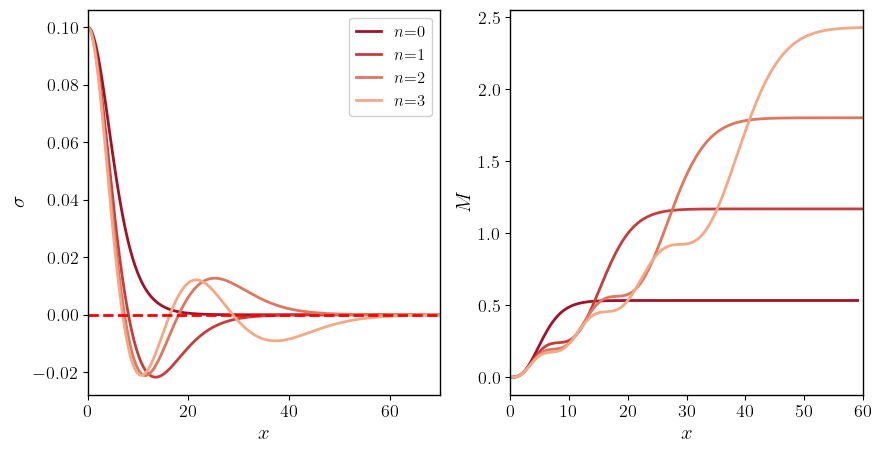

In [17]:
fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (10,5))

ax0 = axes[1]
ax1 = axes[0]


for j,i in enumerate(datos): 
    #profiles(datos, in0, rmin, Rtol, Atol, info = False)
    r, g, N, Phi, Phi_1, m, dN, N = met.profiles(i, in0, rmin = 0 , Rtol=1e-09, Atol=1e-10, info = False)
    ax1.plot(r, Phi,  label=r'$n$={}'.format(nodos[j]), color = colores[j])
    ax0.plot(r, m, color = colores[j])

ax1.set_xlim(0,70)
ax0.set_xlim(0,60)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\sigma$')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$M$')
ax1.axhline(y=0, color='r', linestyle='--')
ax1.legend(fontsize = 12)
plt.savefig("RelativisticBoson_starExcitedn.pdf")
plt.show() 

### Free Case $\lambda =0$, no nodes $n=0$

In [18]:
wmin, wmax =0.0, 2.1
p0 = 0.5
nodos = 0
in0 = [1, 0.24, p0, 0, 0, 0]

datos = []
Lambdas = [0]
for i in Lambdas: 
    # in0, wmin, wmax, Lambda, nodos, rmin=0, rmax=50, met='RK45', Rtol=1e-03, Atol=1e-6, limw=1e-14, info=False
    w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, i, nodos,rmin=0, rmax=100, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)
    datos.append([w0, rTemp, nodosPosit, i])
    
r, g, N, Phi, Phi_1, m, dN, NP = met.profiles(datos[0], in0, rmin = 0 , Rtol=1e-09, Atol=1e-10, info = False)

Finding a profile with  0 nodes
Maxima precisión alcanzada 0.7943848513249014 radio 29.805983160279734


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_19980/688538893.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax1 = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))


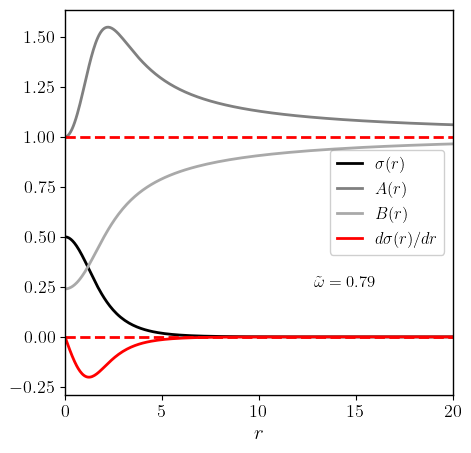

In [19]:
fig, ax1 = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))

#ax0 = axes[1]
#ax1 = axes[0]

#ax0.plot(r, dN)
#ax0.plot(r, m)
ax1.plot(r, Phi, label = '$\sigma(r)$', color = 'black')
ax1.plot(r, g, label = '$A(r)$', color = 'gray')
ax1.plot(r, N, label = '$B(r)$', color = 'darkgray')
ax1.plot(r, Phi_1, label = '$d\sigma(r)/dr$', color = 'red')
#ax0.axhline(y=0, color='r', linestyle='--')
ax1.axhline(y=0, color='r', linestyle='--')
ax1.axhline(y=1.0, color='r', linestyle='--')
#ax1.axhline(y=4.1, color='r', linestyle='--')
plt.text(16, 0.25, r'$\tilde{\omega}=0.79$', fontsize=12, ha='right')
ax1.set_xlabel(r'$r$')
#ax0.set_xlabel(r'$r$')
#ax0.set_ylabel(r'$M(r)$')
ax1.legend(loc='best', fontsize=12) 
ax1.set_xlim(0, 20)
plt.savefig("RelativisticBoson_starFreeCase.pdf")
plt.show()

### Energía vs N

In [ ]:
## DIvidir el proceso para varias omegas w

wmin, wmax = 0.0, 2
p0 = np.linspace(0.001,0.5,20)
nodos = 0
Number = []
dNumber = []
massa = []
phi00 = []

Lambdas = 0

for i in p0: 
    in0 = [1, 1, i, 0, 0, 0]
    # in0, wmin, wmax, Lambda, nodos, rmin=0, rmax=50, met='RK45', Rtol=1e-03, Atol=1e-6, limw=1e-14, info=False
    w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, Lambdas, nodos,rmin=0, rmax=40, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)
    datos = [w0, rTemp, nodosPosit, Lambdas]
    
    r, g, N, Phi, Phi_1, m, dN, NP = met.profiles(datos, in0, rmin = 0, Rtol=1e-09, Atol=1e-10, info = True)
    
    if Phi[-1] > 0.1: 
        continue
    else: 
        Number.append(NP)
        dNumber.append(dN[-1])
        massa.append(m[-1])
        phi00.append(Phi[0]) 
        
wmin, wmax = 0.0, 5
p0 = np.linspace(0.0001,1.5,20)

for i in p0: 
    in0 = [1, 1, i, 0, 0, 0]
    # in0, wmin, wmax, Lambda, nodos, rmin=0, rmax=50, met='RK45', Rtol=1e-03, Atol=1e-6, limw=1e-14, info=False
    w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, Lambdas, nodos,rmin=0, rmax=40, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)
    datos = [w0, rTemp, nodosPosit, Lambdas]
    
    r, g, N, Phi, Phi_1, m, dN, NP = met.profiles(datos, in0, rmin = 0, Rtol=1e-09, Atol=1e-10, info = True)
    
    if Phi[-1] > 0.1: 
        continue
    else: 
        Number.append(NP)
        dNumber.append(dN[-1])
        massa.append(m[-1])
        phi00.append(Phi[0]) 

datos = [Number, dNumber, massa, phi00]


In [26]:
#np.save('data/ShootingMvsSig.npy', datos, allow_pickle=True)
datos = np.load('../data/ShootingMvsSig.npy')
phi00 = datos[3]
massa= datos[2]
dNumber = datos[1]

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_19980/2622791399.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(phi,masss(phi), color = 'black')


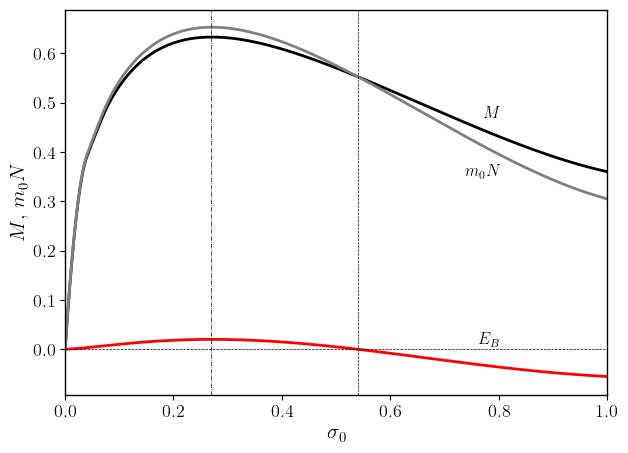

In [27]:
#plt.scatter(phi00,massa)
#plt.scatter(phi00,Number)
#plt.scatter(phi00,dNumber)

masss  = interp1d(phi00, massa, kind='quadratic')
ParticleN= interp1d(phi00, dNumber, kind='quadratic')
phi = np.linspace(phi00[0],phi00[-1],1000)

plt.figure(figsize=(7, 5))

plt.plot(phi,masss(phi), color = 'black')
plt.plot(phi,ParticleN(phi), color = 'gray')
plt.plot(phi,ParticleN(phi)-masss(phi), color = 'red')


plt.text(0.8, 0.47, '$M$', fontsize=12, ha='right')
plt.text(0.8, 0.35, '$m_0N$', fontsize=12, ha='right')
plt.text(0.8, 0.01, '$E_B$', fontsize=12, ha='right')


# Agregar un título y etiquetas a los ejes
#plt.title("Gráfica de ejemplo")
plt.ylabel("$M$, $m_0N$")
plt.xlabel("$\sigma_0$")
plt.xlim(0, 1.0)

plt.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=0.54, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=0.27, color='black', linestyle='-.', linewidth=0.5)


plt.savefig("RelativisticBoson_NMvsS.pdf")


plt.show()

### Grafiquemos el comportamiento de Una estrella de bosones libre confrome elegimos $\omega$ muy grande o muy pequeño 

In [ ]:
p0 = 0.1
in0 = [1, 1, p0, 0, 0, 0]
Lambda = 0
nodos = 0

datos = []
wmin = [0.0, 0, 0]
wmax = [1.9,2.1, 2.2] #Elegimos un valor muy pequeño de w= 0.7 y un valor muy grande w= 10
for j,i in enumerate(wmax): 
    w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin[j], i, Lambda, nodos,rmin=0, rmax=100, met='RK45', Rtol=1e-09, Atol=1e-10,limw=1e-14, info=False)
    datos.append([w0, rTemp, nodosPosit, Lambda])

In [ ]:
datos = [[0.9726981262164745, 57.25684336615575,0,0],
[1.0726981262164745, 57.25684336615575,0,0],
[1.09000000000000113, 57.25684336615575,0,0]]

p0 = 0.1
in0 = [1, 1, p0, 0, 0, 0]
Lambda = 0
nodos = 0


fig, axes = plt.subplots(nrows= 1, ncols = 3, figsize = (18,6))

ax0 = axes[1]
ax1 = axes[0]
ax2 = axes[2]

for j,i in enumerate(datos): 
    #profiles(datos, in0, rmin, Rtol, Atol, info = False)
    r, g, N, Phi, Phi_1, m, dN, NP = met.profiles(i, in0, rmin = 0 , Rtol=1e-09, Atol=1e-10, info = False)
    if j==0: 
        ax1.plot(r, Phi, label = r'$\tilde{\omega} = 0.972 $', color = 'black')
    if j==1: 
        ax0.plot(r, Phi, label = r'$\tilde{\omega} = 1.072$', color = 'black')
    if j==2: 
        ax2.plot(r, Phi, label = r'$\tilde{\omega} = 1.090$', color = 'black')

ax1.set_xlim(0,40)
ax0.set_xlim(0,40)
ax2.set_xlim(0,40)
ax1.axhline(y=0, color='r', linestyle='--')
ax0.axhline(y=0, color='r', linestyle='--')
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\sigma$')
ax0.set_xlabel(r'$x$')
ax1.set_xlabel(r'$x$')
ax0.legend()
ax1.legend()
ax2.legend()
plt.savefig("RelativisticBoson_Shooting.pdf")
plt.show() 

### Grafiquemos la Relacion Massa Total vs $\sigma_{0}$

In [ ]:
##Masa vs Radio
PHI0 =[]
wmin, wmax = 0.0, 2
p0 = np.linspace(0.0, 0.5, 10)

Lambda = 0
nodos = 0

datos = []

for i in p0: 
    in0 = [1, 1, i, 0, 0, 0]
    w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, Lambda, nodos,rmin=0, rmax=50, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)
    datos.append([w0, rTemp, nodosPosit, 0])
    PHI0.append(i)
wmin, wmax = 0.0, 5
p0 = np.linspace(0.5,1.0, 10)

for i in p0: 
    in0 = [1, 1, i, 0, 0, 0]
    w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, Lambda, nodos,rmin=0, rmax=50, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)
    datos.append([w0, rTemp, nodosPosit, 0])
    PHI0.append(i)
wmin, wmax = 0.0, 5
p0 = np.linspace(0.5,1.0, 10)

for i in p0: 
    in0 = [1, 1, i, 0, 0, 0]
    w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, Lambda, nodos,rmin=0, rmax=50, met='RK45', Rtol=1e-09, Atol=1e-10,
               limw=1e-14, info=False)
    datos.append([w0, rTemp, nodosPosit, 0])
    PHI0.append(i)
    


In [101]:
np.save('../data/ShootingMvsSig2.npy', datos, allow_pickle=True)

/Users/edgarpreciado/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [54]:
datos = np.load('../data/ShootingMvsSig2.npy', allow_pickle=True)

In [ ]:
# [g, g', N, N', Phi, Phi'] -> [g0, g1, n0, n1, p0, p1]
MasaTotal = []
phi0 = []

for i, dato in enumerate(datos):
    in0 = [1, 1, PHI0[i], 0, 0, 0]
    r, g, N, Phi, Phi_1, m, dN, NP = met.profiles(dato, in0, rmin = 0, Rtol=1e-09, Atol=1e-10, info = True)
    
   
    MasaTotal.append(m[-1])
    phi0.append(Phi[0])


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_19980/4011194652.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.scatter(phi0, MasaTotal)


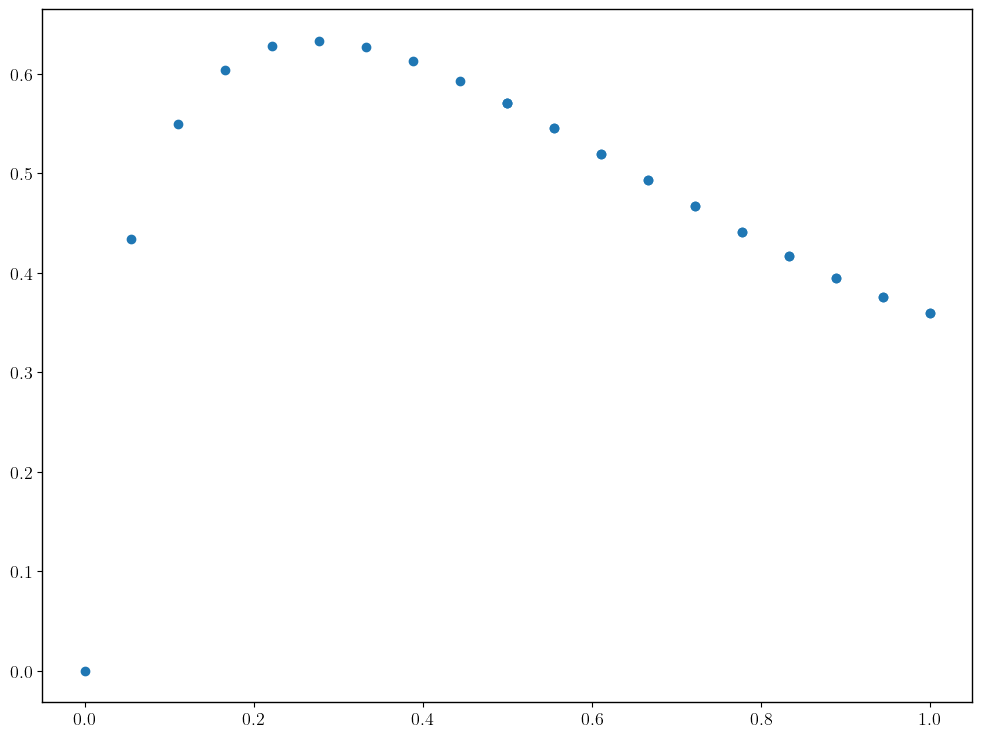

In [100]:
plt.scatter(phi0, MasaTotal)

In [102]:
Sigma0_non = [0.8696623188405797,
 2.1740057971014495,
 3.043568115942029,
 3.478349275362319,
 4.347911594202898,
 4.782692753623188,
 5.652255072463768,
 6.087036231884057,
 6.521817391304348,
 6.956598550724637,
 8.695723188405797,
 9.565285507246376,
 10.434847826086955,
 10.869628985507246,
 11.739191304347825,
 12.173972463768115,
 14.347878260869564,
 14.782659420289853,
 15.652221739130434,
 16.087002898550722,
 17.826127536231883,
 18.695689855072462,
 19.130471014492752,
 20.43481449275362,
 21.304376811594203,
 22.173939130434782,
 22.60872028985507,
 24.34784492753623,
 24.78262608695652,
 25.21740724637681,
 27.39131304347826,
 29.130437681159417,
 30.0]
Massa_non = [3.234346125143957,
 5.1137738338089695,
 6.050659038514389,
 6.468413313169075,
 7.2318851461185965,
 7.584857200834309,
 8.245595838564348,
 8.556853786487622,
 8.8571802911545,
 9.147652086714464,
 10.227371248856812,
 10.726551851960311,
 11.203513137032832,
 11.43453552181677,
 11.883113841823592,
 12.101168975187889,
 13.137266477930005,
 13.334829076692982,
 13.721423340268732,
 13.910692091377117,
 14.643324022083476,
 14.996223871382018,
 15.16959545881441,
 15.678211452588032,
 16.008313662815933,
 16.33174510956854,
 16.491082265826783,
 17.113602141403398,
 17.26572541906331,
 17.416520037897257,
 18.151712045835094,
 18.719087428048912,
 18.99642140280143]

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_19980/3596157258.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))


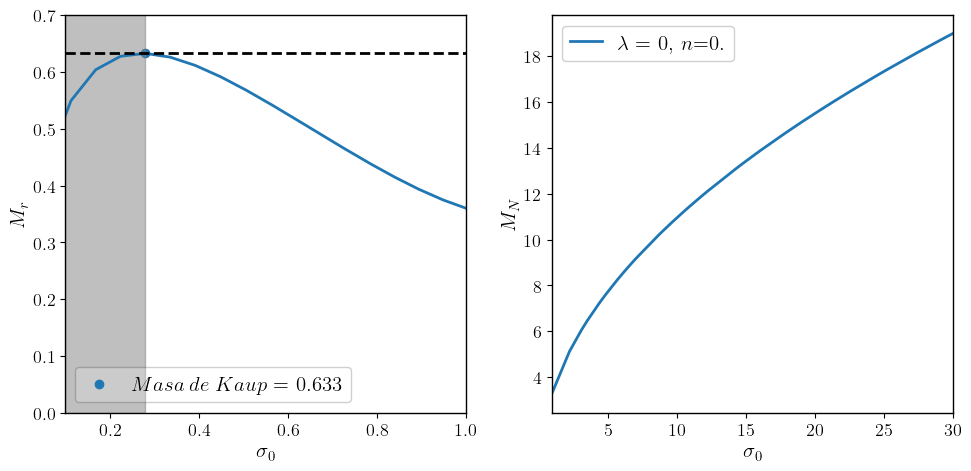

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
ax1 = axes[0]
ax2 = axes[1]


##################################
#ax1.plot(phi0, MasaTotal)

NRBstarML0n1   = interp1d(phi0, MasaTotal, kind='linear', fill_value='extrapolate')
NRRadioL0n1 = np.linspace(phi0[0],phi0[-1],3000)
ax1.plot(NRRadioL0n1,NRBstarML0n1(NRRadioL0n1))
##################################

ax2.plot(Sigma0_non,Massa_non, label = r'$\lambda$ = 0, $n$=0.')
ax1.scatter(0.2777777777777778,max(MasaTotal), label = r'$Masa\;de\;Kaup$ = {:.3f}'.format(max(MasaTotal)))
#ax2.scatter(0.88245,Massa_non[0],label = r'$\sigma_0$ = 1')

ax1.legend(loc="lower left")
ax2.legend(loc="best")

ax1.set_xlim(0.0976470588235294, 1.0)
ax1.set_ylim(0.0, 0.7)
ax2.set_xlim(0.88245, 30.0)
ax1.set_xlabel(r'$\sigma_{0}$')
ax1.set_ylabel(r'$M_r$')
ax2.set_xlabel(r'$\sigma_{0}$')
ax2.set_ylabel(r'$M_N$')
#ax1.axvline(0.31676470588235295,color='black',ls='--')
#ax1.axvline(x=3, color='r', linestyle='--', label='Línea vertical')
ax1.axhline(max(MasaTotal),color='black',ls='--')
#\sigma_ma = 0.2777777777777778 M = Max = 0.6329135460623307
ax1.fill_betweenx(y=[0,max(MasaTotal)+0.1],x1=0.0976470588235294, x2=0.2777778, color='grey', alpha=0.5, label='Franja vertical entre x=2 y x=4')
#ax1.set_label(r'$M$ ={:.3f}'.format(sol2.y[4][-1]))
#ax1.set_title(r'Relativistic mini-Boson Star.')
#ax2.set_title(r'Non-Relativistic Boson Star.')
fig.tight_layout()
plt.savefig("MassVs_Sigma00.pdf") 
plt.show()


### Massa Vs Lambda

In [ ]:
massa0 = []
phi0 = []
massa10 = []
phi10 = []
massa15 = []
phi15 = []
massa25 = []
phi25 = []

In [ ]:
## DIvidir el proceso para varias omegas w
wmin, wmax = 0.0, 7
p0 = np.linspace(0.4,0.5,15)
nodos = 0

Lambdas = [25] 

for j in Lambdas: 
    for i in p0: 
        in0 = [1, 1, i, 0, 0, 0]
        # in0, wmin, wmax, Lambda, nodos, rmin=0, rmax=50, met='RK45', Rtol=1e-03, Atol=1e-6, limw=1e-14, info=False
        w0, rTemp, nodosPosit = met.Freq_solveNodos(in0, wmin, wmax, j, nodos,rmin=0, rmax=30, met='RK45', Rtol=1e-09, Atol=1e-10,
                   limw=1e-14, info=False)
        datos = [w0, rTemp, nodosPosit, j]

        r, g, N, Phi, Phi_1, m, dN, NP = met.profiles(datos, in0, rmin = 0, Rtol=1e-09, Atol=1e-10, info = False)
    
        if Phi[-1] > 0.1: 
            continue
        else:
            plt.plot(r, Phi)
            

            if j== 0:
                massa0.append(m[-1])
                phi0.append(Phi[0]) 
                
            elif j== 10:
                massa10.append(m[-1])
                phi10.append(Phi[0]) 
                
            elif j== 15:
                massa15.append(m[-1])
                phi15.append(Phi[0])
                
            elif j== 25:
                massa25.append(m[-1])
                phi25.append(Phi[0])
                

In [ ]:
#Datos_Salvados = [massa0,phi0,massa10,phi10,massa15,phi15,massa25,phi25]
#np.save('MasaVsLambdas.npy', Datos_Salvados , allow_pickle=True)
datos = np.load('MasaVsLambdas.npy',allow_pickle=True)

In [ ]:
def del_rep(x,y):
    for k, i in enumerate(x): 
        if x.count(i) >= 2:
            x.pop(k)
            y.pop(k)
        else:
            continue 
    return x, y

In [ ]:
phi0, massa0 = del_rep(datos[1],datos[0])
phi10, massa10 = del_rep(datos[3],datos[2])
phi15, massa15 = del_rep(datos[5],datos[4])
phi25, massa25 = del_rep(datos[7],datos[6])

In [ ]:
for k,i in enumerate(phi25):
    print('n.', k,i, massa25[k])

In [ ]:
#phi10.pop(0)
#massa10.pop(0)
#plt.scatter(phi0, massa0, label = '0')
#plt.scatter(phi10,massa10, label = '10')
#plt.scatter(phi15,massa15, label = '15')
plt.scatter(phi25,massa25, label = '25')

masa_25  = interp1d(phi25, massa25, kind='quadratic')
phi_25 = np.linspace(phi25[18],phi25[-1],1000)
plt.plot(phi_25,masa_25(phi_25), label = '$\lambda^{\prime}=25$', color = 'black')




plt.legend()

In [ ]:
plt.figure(figsize=(7, 5))

#plt.scatter(phi0, massa0, label = 'L = 0')
#plt.scatter(phi10, massa10, label = 'L = 10')
#plt.scatter(phi15, massa15, label = 'L = 15')
#plt.scatter(phi25, massa25, label = 'L = 25')


masss_0  = interp1d(phi0, massa0, kind='quadratic')
phi_0 = np.linspace(phi0[7],phi0[-1],1000)
plt.plot(phi_0,masss_0(phi_0), label = '$\lambda^{\prime}=0$',  color = 'darkgray')

masss1  = interp1d(phi15, massa15, kind='quadratic')
phi = np.linspace(phi15[3],phi15[-1],1000)
plt.plot(phi,masss1(phi), label = '$\lambda^{\prime}=15$', color = 'darkred')

masa_10  = interp1d(phi10, massa10, kind='quadratic')
phi_10 = np.linspace(phi10[3],phi10[-1],1000)
plt.plot(phi_10,masa_10(phi_10), label = '$\lambda^{\prime}=10$', color = 'gray')

masa_25  = interp1d(phi25, massa25, kind='quadratic')
phi_25 = np.linspace(phi25[18],phi25[-1],1000)
plt.plot(phi_25,masa_25(phi_25), label = '$\lambda^{\prime}=25$', color = 'black')


plt.text(0.245, 1.47, '$\lambda= 25$', fontsize=12, ha='right')
plt.text(0.17, 1.40, '$\lambda= 15$', fontsize=12, ha='right')
plt.text(0.18, 1.2, '$\lambda= 10$', fontsize=12, ha='right')
plt.text(0.2, 0.67, '$\lambda= 0$', fontsize=12, ha='right')


plt.ylabel("$M$")
plt.xlabel("$\sigma_0$")
plt.xlim(0,0.44)
plt.legend()


plt.savefig("MassvsLambda.pdf")

plt.show()
